In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
This content is part of a series about Chapter 3 on probability from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts.
</span>

You can find the corresponding post [here](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/) on my blog.

# Introduction

I'm happy to present here the following of my series on the Deep Learning Book by Goodfellow et al. This is the first post/notebook made from chapter 3 on Probability. For those who already know my posts/notebooks about [Chapter 2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/) on linear algebra, the goal and the structure are the same. The aim is to make the book more accessible **for people without a deep mathematical background**. For more information, you can refer to the [introductory post](https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf).

I think that it is possible to gain a **better intuition** on mathematical concepts by using code (here Python) and visualisations. The structure follows the book sub-chapters and it can be used as additional content, giving examples and details.

This first part is about chapters 3.1 to 3.3. Chapter 3.1 is an introduction to probability and contains no technical difficulty. You can thus directly read it [here](https://www.deeplearningbook.org/contents/prob.html). Chapter 3.2 is really only a definition so the main part is 3.3 on **probability mass function** and **probability density function**. After reading it, **random variables** and their probability distributions (for **discrete and continuous variables**) will have no secret for you 🏄🏾‍♂️.

In order to understand it we'll also study some very useful mathematical tools:

🔧 **Discrete vs. continuous variable**

🔧 **Derivative**

🔧 **Integrals**

🔧 **Area under the curve**

These notions are important to catch for general data science and machine learning.

# 3.2 Random Variables

The goal of probability is to deal with uncertainty. It gives ways to describe random events. A random variable is a variable that can take multiple values depending on the outcome of a random event. The possible outcomes are the possible values taken by the variable.

If the outcomes are finite (for example the 6 possibilities in a die throwing event) the random variable is said to be **discrete**.

If the possible outcomes are not finite (for example, drawing a number between $0$ and $1$ can give an infinite number of values), the random variable is said to be **continuous**.

As in the book, we will use the following notation: a lower case letter in plain typeface for a random variable: $\text{x}$.

### Example 1.

Let's say that the variable $\text{x}$ is a random variable expressing the result of a dice roll 🎲. The variable can take the value 1, 2, 3, 4, 5 or 6. It is a discrete random variable.

# 3.3 Probability Distributions

So a random variable can take multiple values. One very important thing is to know if some values will be more often encountered than others. The description of the probability of each possible value that a random variable can take is called its **probability distribution**.

This idea of discrete versus continuous variable is important and we will study the concept of probability distribution in both cases. Even if they are related, some differences exist.

Anyway, the probability distribution of a random variable $\text{x}$ describes the probability of each outcome (a probability of 1 meaning that the variable will always take this value and a probability of 0 that it will never be encountered). This function is called probability distribution. More specifically, it is called the **probability mass function** for a discrete variable and **probability density function** for a continuous variable.

## 3.3.1 Discrete Variable and Probability Mass Function

The **probability mass function** is the function which describes the probability associated with the random variable $\text{x}$. This function is named $P(\text{x})$ or $P(\text{x} = x)$ to avoid confusion. $P(\text{x} = x)$ corresponds to the probability that the random variable $\text{x}$ take the value $x$ (note the different typefaces).

### Example 2.

<img src="images/all_dice.png" width="400" alt="Dice experiment illustrating discrete random variable and probability mass function" title="Dice experiment illustrating discrete random variable and probability mass function">
<em>Dice experiment illustrating discrete random variable and probability mass function</em>

Let's roll a die an infinite number of times and look at the proportion of 1, the proportion of 2 and so on. We call $\text{x}$ the random variable that corresponds to the outcome of the dice roll. Thus the random variable $\text{x}$ can only takes the following discrete values: 1, 2, 3, 4, 5 or 6. It is thus a **discrete random variable**.

The aim of the probability mass function is to describe the probability of each possible value. In our example, it describes the probability to get a 1, the probability to get a 2 and so on. In the case of a dice rolling experiment, we have the same probability to get each value (if we assume that the die is perfect). This means that we can write:

$$
\begin{align*}
P(\text{x}=1)&=P(\text{x}=2)\\\\
&=P(\text{x}=3)\\\\
&=P(\text{x}=4)\\\\
&=P(\text{x}=5)\\\\
&=P(\text{x}=6)
\end{align*}
$$

Now, how can we calculate the probabilities $P(\text{x}=1)$, $P(\text{x}=2)$ etc.? Since we have 6 possible outcomes and that they are equiprobable we have:

$$
\begin{align*}
P(\text{x}=1)&=P(\text{x}=2)\\\\
&=P(\text{x}=3)\\\\
&=P(\text{x}=4)\\\\
&=P(\text{x}=5)\\\\
&=P(\text{x}=6)\\\\
&=\frac{1}{6}
\end{align*}
$$

By the way, this distribution shows the same probability for each value: it is called the **uniform distribution**.

The probability mass function could look something like:

<img src="images/mass.png" width="300" alt="probability mass function of the dice experiment" title="Probability mass function of the dice experiment">
<em>Probability mass function of the dice experiment</em>

The y-axis gives the probability and x-axis the outcome.

Let's reproduce this first example in code to be sure that everything is clear:

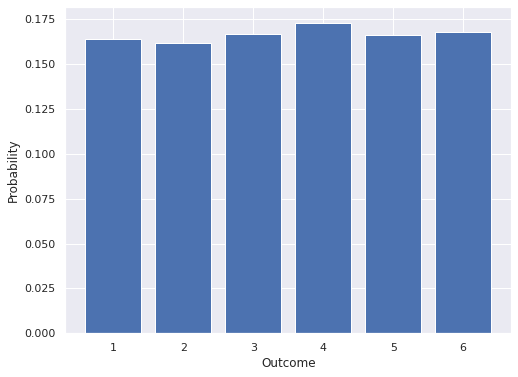

In [4]:
num_throws = 10000
outcomes = np.zeros(num_throws)
for i in range(num_throws):
    # let's roll the die
    outcome = np.random.choice(['1', '2', '3', '4', '5', '6'])
    outcomes[i] = outcome

    
val, cnt = np.unique(outcomes, return_counts=True)
prop = cnt / len(outcomes)

# Now that we have rolled our die 10000 times, let's plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()
plt.close()

I created an array filled with $0$ with the Numpy function `zeros()`. At each throw, I chose a value among the 6 possibilities. Then, I used the Numpy function `unique()` with the parameter `return_counts` set to `True` to get the number of each possible outcome. I plotted the proportion for each possible value.

We can see that the distribution looks like a uniform distribution and that each outcome has a probability of around $\frac{1}{6}$ ($\approx 0.17$).

### Joint probability distribution

Now let's see what happens if we roll two dice. For each die, the outcomes are associated with a certain probability. We need two random variables to describe the game, let's say that $\text{x}$ corresponds to the first die and $\text{y}$ to the second one. We also have two probability mass functions associated with the random variables: $P(\text{x})$ and $P(\text{y})$. Here the possible values of the random variables (1, 2, 3, 4, 5 or 6) and the probability mass functions are actually the same for both dice, but it doesn't need to be the case.

The **joint probability distribution** is useful in the cases where we are interested in the probability that $\text{x}$ takes a specific value while $\text{y}$ takes another specific value. For instance, what would be the probability to get a 1 with the first dice and 2 with the second dice? The probabilities corresponding to every pair of values are written $P(\text{x}=x, \text{y}=y)$ or $P(\text{x}, \text{y})$. This is what we call the **joint probability**.

### Example 3.

For example, let's calculate the probability to have a 1 with the first dice and a 2 in the second:

$$
P(\text{x}=1, \text{y}=2) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.028
$$


### Properties of a probability mass function

A function is a probability mass function if:

$$
\forall x \in \text{x}, 0 \leq P(x) \leq 1
$$

The symbol $\forall$ means "for any". This means that for every possible value $x$ in the range of $\text{x}$ (in the example of a die rolling experiment, all possible values were 1, 2, 3, 4, 5 and 6), the probability that the outcome corresponds to this value is between 0 and 1. A probability of 0 means that the event is impossible and a probability of 1 means that you can be sure that the outcome will correspond to this value.

In the example of the dice, the probability of each possible value is $\frac{1}{6}$ which is between 0 and 1. This property is fulfilled.

$$
\sum\limits_{x \in \text{x}} P(x) = 1
$$

This means that the sum of the probabilities associated with each possible value is equal to 1.

In the example of the dice experiment, we can see that there are 6 possible outcomes, each with a probability of $\frac{1}{6}$ giving a total of $\frac{1}{6} \times 6 = 1$. This property is fulfilled.

## 3.3.2 Continuous Variable and Probability Density Function

Some variables are not discrete. They can take an infinite number of values in a certain range. But we still need to describe the probability associated with outcomes. The equivalent of the probability mass function for continuous variable is called the **probability density function**.

In the case of the probability mass function, we saw that the y-axis gives a probability. For instance, in the plot we created with Python, the probability to get a $1$ was equal to $\frac{1}{6} \approx 0.16$ (check on the plot above). It is $\frac{1}{6}$ because it is one possibility over 6 total possibilities.

However, we can't do this for continuous variables because the total number of possibilities is infinite. For instance, if we draw a number between 0 and 1, we have an infinite number of possible outcomes (for instance 0.320502304...). In the example above, we had 6 possible outcomes, leading to probabilities around $\frac{1}{6}$. Now, we have each probability equal to $\frac{1}{+\infty} \approx 0$. Such a function would not be very useful.

For that reason, the y-axis of the probability density function doesn't represent probability values. To get the probability, we need to calculate the **area under the curve** (we will see below some details about the area under the curve). The advantage is that it leads to the probabilities according to a certain range (on the x-axis): the area under the curve increases if the range increases. Let's see some examples to clarify all of this.

### Example 4.

Let's say that we have a random variable $\text{x}$ that can take values between 0 and 1. Here is its probability density function:

<img src="images/probability-density-function.png" width="300" alt="Illustration of the probability density function" title="Probability density function (pdf)">
<em>Probability density function</em>

We can see that $0$ seems to be not possible (probability around 0) and neither $1$. The pic around $0.3$ means that will get a lot of outcomes around this value.

Finding probabilities from probability density function between a certain range of values can be done by calculating the area under the curve for this range. For example, the probability of drawing a value between $0.5$ and $0.6$ corresponds to the following area:

<img src="images/probability-density-function-area-under-the-curve-1.png" width="300" alt="Illustration of the probability density function and the area under the curve corresponding to the range 0.5-0.6" title="Probability density function (pdf) and area under the curve">
<em>Probability density function and area under the curve between 0.5 and 0.6.</em>

We can easily see that if we increase the range, the probability (the area under the curve) will increase as well. For instance, for the range of 0.5-0.7:

<img src="images/probability-density-function-area-under-the-curve-2.png" width="300" alt="Illustration of the probability density function and the area under the curve corresponding to the range 0.5-0.7" title="Probability density function (pdf) and area under the curve">
<em>Probability density function and area under the curve between 0.5 and 0.7.</em>

We will see in a moment how to calculate the area under the curve and get the probability associated with a specific range.

### Properties of the probability density function

These differences between the probability mass functions and the probability density function lead to different properties for the probability density function:

1. $\forall x \in \text{x}, p(x) \geq  0$.

In this case, $p(x)$ is not necessarily less than 1 because **it doesn't correspond to the probability** (the probability itself will still need to be between $0$ and $1$).

### Example 5.

For instance, let's say that we have a continuous random variable that can take values between $0$ and $0.5$. This variable is described by a uniform distribution so we will have the following probability distribution function:

<img src="images/area_under_curve_more_1.png" width="150" alt="Illustration of the probability density function  (uniform distribution) with y value greater than 1" title="Probability density function (pdf) with y-values greater than 1">
<em>Probability density function (uniform distribution). The area under the curve is equal to 1 ($2 \times 0.5$) and the y-values are greater than 1.</em>

We can see that the y-values are greater than $1$. The probability is given by the area under the curve and thus it depends on the x-axis as well.

🤨 If you like to see this by yourself, we will reproduce this example in Python. To do that we will create a random variable $\text{x}$ that can take a value between $0$ and $0.5$ randomly. The uniform distribution will be used thanks to the Numpy function `random.uniform()`. The parameters of this function are the lowest value (included), the highest value (not included) and the number of samples. So `np.random.uniform(0, 0.5, 10000)` will create 10000 value randomly chosen to be $\geq 0$ and $\lt 0.5$.

/home/renato/Documents/env_default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


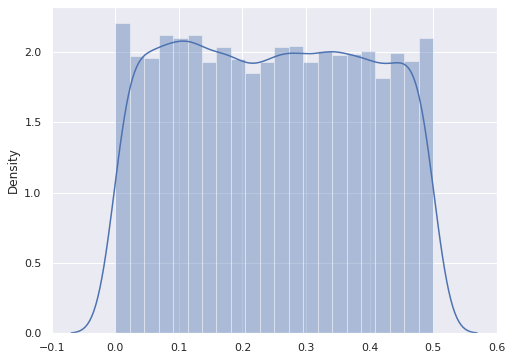

In [5]:
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x)
#sns.displot(x)
#sns.histplot(x)
plt.show()

Looks good! 🏄🏽‍♀️

We can see that the shape looks like what I draw above with y-axis values around 2 for all $x$ between $0$ and $0.5$.

However, one thing can be intriguing in this plot. We talked about continuous variable and here we have represented the distribution with bars. The explanation is the same as before: we need to discretise the function to count the number of outcomes in each interval. Actually, the number of intervals is a parameter of the function `distplot()`. Let's try to use a lot of bins:

/home/renato/Documents/env_default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


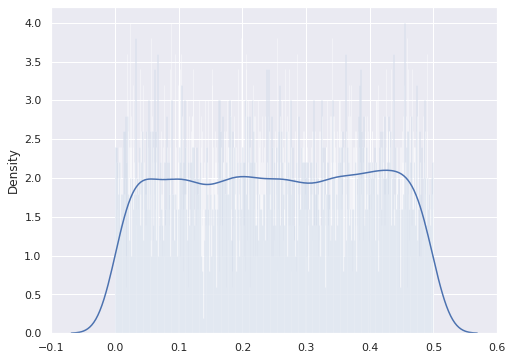

In [6]:
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x, bins=1000)
#sns.displot(x, bins=1000)
#sns.histplot(x, bins=1000)
plt.show()

We can see that we are still around $2$ but that the variability is greater than before (the bars can go from 1 to 4 which was not the case in the last plot). Any idea why?🤔

💡This is because since we took more bins, a smaller number of values were in each bin leading to a less accurate estimate. If this hypothesis is true, we could reduce this variability by increasing the number of samples. Let's try that:

/home/renato/Documents/env_default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


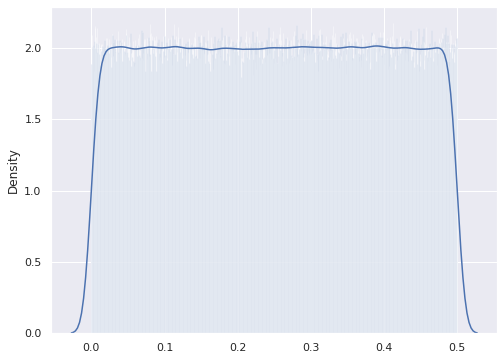

In [7]:
x = np.random.uniform(0, 0.5, 1000000)

sns.distplot(x, bins=1000)
#sns.displot(x, bins=1000)
#sns.histplot(x, bins=1000)

plt.show()

That's great 🤸🏼‍♂️

We can now go to the second property!

$$
\int p(x)dx = 1
$$

For the probability mass function, we have seen that the sum of the probabilities has to be equal to $1$. This is not the case for the probability density functions since the probability corresponds to the area under the curve and not directly to $y$ values. However, this means that **the area under the curve has to be equal to 1**.

We saw in the last example, that the area was actually equal to 1. It can be easily obtained and visualised because of the squared shape of the uniform distribution. It is thus possible to multiply the height by the width: $2 \times 0.5 = 1$.

However, in many cases, the shape is not a square and we still need to calculate the area under the curve. Let's see how to do this!

### 🔧 Area under the curve

The area under the curve of a function for a specific range of values can be calculated with the **integral** of the function. We will see that calculating the integral of a function is the opposite of calculating the derivative. This means that if you derive a function $f(x)$ and calculate the integral of the resulting function $f'(x)$ you will get back $f(x)$.😮

The derivative at a point of a function gives its **rate of change**. What is the link between the function describing the rate of change of another function (the derivative) and the area under the curve 🤔?

Let's start with a point on derivative! And then, with the next graphical example, it will be crystal clear. 🔮


### Example 6.

We want to modelise the speed of a vehicle. Let's say that the function $f(x) = x^2$ define its speed (y-axis) in function of time (x-axis).

First, we will plot the function $f(x)=x^2$ it to see its shape:

(-1.0, 10.0)

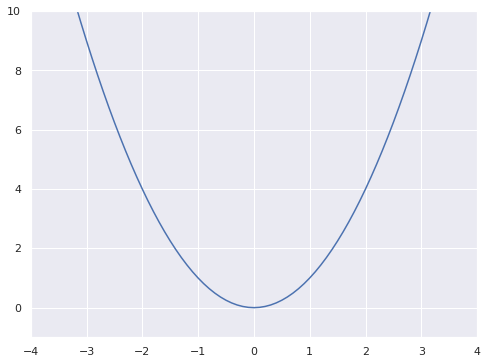

In [8]:
x = np.arange(-10, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-4, 4)
plt.ylim(-1, 10)

The shape is a parabola! It shows that the speed increases slowly at the beginning but increases more and more for a constant duration.

I have created a variable $x$ (with the function `arange()` from Numpy) that contains all the points of the x-axis. So it is just all values from -10 to 10 with a step of $0.1$. Let's see the first 10 values.

In [9]:
x[:10]

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1])

Here is [the doc](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) of the `arange()` function from Numpy.

In our example, the function defines the speed of the vehicle in function of time so it doesn't make sense to have negative values. Let's take only the positive part of the x-axis to avoid negative time (we'll say that 0 is the start of the experiment).

(-1.0, 10.0)

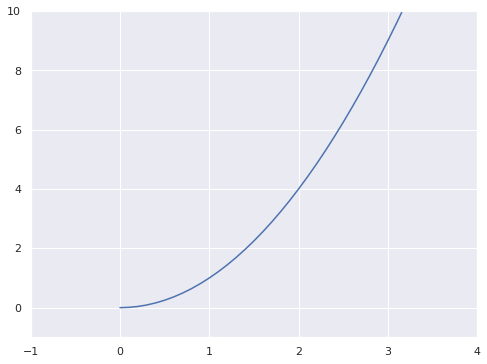

In [10]:
x = np.arange(0, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-1, 4)
plt.ylim(-1, 10)

Ok, that's better!

The derivative of this function is $f'(x)=2x$. To have more information about derivative rules, check [here](https://www.mathsisfun.com/calculus/derivatives-rules.html).

Here is a plot of $f'(x)$:

(0.0, 10.0)

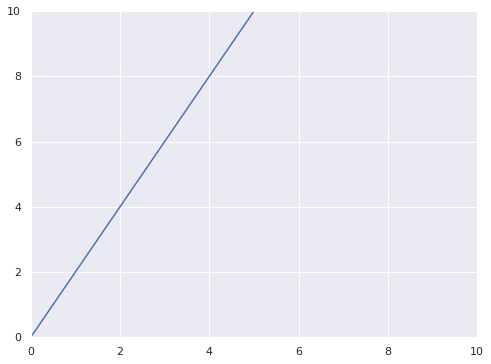

In [11]:
x = np.arange(-10, 11)
fx = 2 * x

plt.plot(x, fx)
plt.xlim(0, 10)
plt.ylim(0, 10)

### 🔧 Derivative

This representation of the derivative shows the acceleration. $f(x)$ described the speed of the vehicle in function of time and the derivative $f'(x)$ shows the **rate of change** of the speed in function of time, that is the acceleration.

We can see that the acceleration of the vehicle increases linearly with time. The derivative tells us that the rate of change of the vehicle speed is $2x$. For instance, when $x=0$, the rate of change is equal to $2\times0=0$, so the speed is not changing. When $x=3$, the rate of change is $2\times3=6$. This means that at this point, the speed is increased by $6$ when time is increased by $1$.

To summarise, the derivative of a function gives its rate of change. In our example, the rate of change was another function ($f'(x) = 2x$) but it can be a constant (the rate of change is always the same, e.g. $f'(x)=2$) or a quadratic function for instance (e.g. $f'(x) = x^3$).

### 🔧 Integrals

Being able to calculate derivatives is very powerful but is it possible to do the reverse: going from the rate of change to the change itself 😮. Whoah, this is cool! The answer is given by the integral of a function.

The integral of $f'(x)$ gives us $f(x)$ back. The notation is the following:

$$
\int f'(x) dx = f(x)
$$

This means that we take $f'(x)$ to get back $f(x)$. The notation $dx$ here means that we integrate over $x$, that is to say, that we sum slices weighted by $y$ (see [here](https://www.mathsisfun.com/calculus/integration-introduction.html)).

If we take again the last example we have:

$$
\int 2x dx = x^2 + c
$$

We can see that there is a difference: the addition of a constant $c$. This is because an infinite number of function could have given the derivative $2x$ (for instance $x^2 + 1$ or $x^2 + 294$...). We lose a bit of information and we can't recover it.

And now, the graphical explanation (I love this one 💛): we have seen that $2x$ is the function describing the rate of change (the slope) of the function $x^2$. Now if we go from $f'(x)$ to $f(x)$ we can see that the area under the curve of $f'(x)$ correspond to $f(x)$:

<img src="images/area-under-curve-derivative.png" width="600" alt="Illustration of the area under the curve of the derivative: it corresponds to the original function" title="Area under the curve of the derivative">
<em>The area under the curve of $f'(x)$ corresponds to $f(x)$. This shows how the integral and derivative are reverse operations.</em>

This plot shows the function $f'(x)=2x$ and we can see that the area under the curve increases exponentially. This area is represented for different ranges ([0-0], [0-1], [0-2], [0-3]). We can calculate the area under the curve (using the Pythagorean theorem and dividing by 2 since the areas are half squares) and find the following values: 0, 1, 4, 9... This corresponds to the original function $f(x)=x^2$! 🎺

## Conclusion

To summarise, we have seen what is a random variable and how the distribution of probabilities can be expressed for discrete (probability mass function) and continuous variable (probability density function). We also studied the concept of joint probability distribution and bedrock math tools like derivatives and integrals.

You now have all the tools to dive more into probability. The next part will be about the chapters 3.4 to 3.8. We will see what we called marginal and conditional probability, the chain rule and the concept of independence.

I hope that this helped you to gain a better intuition on all of this! Feel free to contact me about any question/note/correction! 😀
